In [103]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

import warnings
warnings.filterwarnings('ignore')


# Investigation of Logistic Regression model performance

In diagnosing why the Logistic Regression model failed to make accurate predictions, we can study first-hand the best practices and proper utilization of Logistic Regression models.

The model performs binary classification to predict whether an individual will respond to an advertisement campaign based on individual characteristics such as age, distance from sales location, income bracket, gender, and marital status.

In [104]:
display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,73,4.371654,"90-99,999",M,S,1
1,2,89,1.582733,"100-149,999",M,NaN,1
2,3,85,1.223810,"10-19,999",F,S,1
3,4,76,2.962427,"90-99,999",M,M,1
4,5,76,2.594408,"10-19,999",M,S,1


# clean data 

In [105]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

# Replace income with appropriate midpoints or custom values
income_mapping = {
    "unknown": 6,              # replacing unknown with the median income level
    "Under $10k": 1,            # midpoint of "Under $10k"
    "10-19,999": 2,            # midpoint of "10-19,999"
    "20-29,999": 3,            # midpoint of "20-29,999"
    "30-39,999": 4,            # midpoint of "30-39,999"
    "40-49,999": 5,            # midpoint of "40-49,999"
    "50-59,999": 6,            # midpoint of "50-59,999"
    "60-69,999": 7,            # midpoint of "60-69,999"
    "70-79,999": 8,            # midpoint of "70-79,999"
    "80-89,999": 9,            # midpoint of "80-89,999"
    "90-99,999": 10,            # midpoint of "90-99,999"
    "100-149,999": 11,         # midpoint of "100-149,999"
    "150 - 174,999": 12,       # midpoint of "150 - 174,999"
    "175 - 199,999": 13,       # midpoint of "175 - 199,999"
    "200 - 249,999": 14,       # midpoint of "200 - 249,999"
    "250k+": 15               # custom value for "250k+"
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

Male is 1 and female is 0, married is 1 and single is 0, and response is 1 and no response is 0. 

In [106]:
display(data.head())

,id,age,dist,income,gender,marital_status,target
0,1,73,4,10,1,0,1
1,2,89,1,11,1,1,1
2,3,85,1,2,0,0,1
3,4,76,2,10,1,1,1
4,5,76,2,2,1,0,1


# Evaluate Logistic Regression

Optimization terminated successfully.
         Current function value: 0.521321
         Iterations 6
Model Summary:
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3200
Model:                          Logit   Df Residuals:                     3194
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Dec 2024   Pseudo R-squ.:                 0.06309
Time:                        16:46:14   Log-Likelihood:                -1668.2
converged:                       True   LL-Null:                       -1780.6
Covariance Type:            nonrobust   LLR p-value:                 1.494e-46
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5569      0.453    -10.067      0.000      -5.444      -3.670
ag

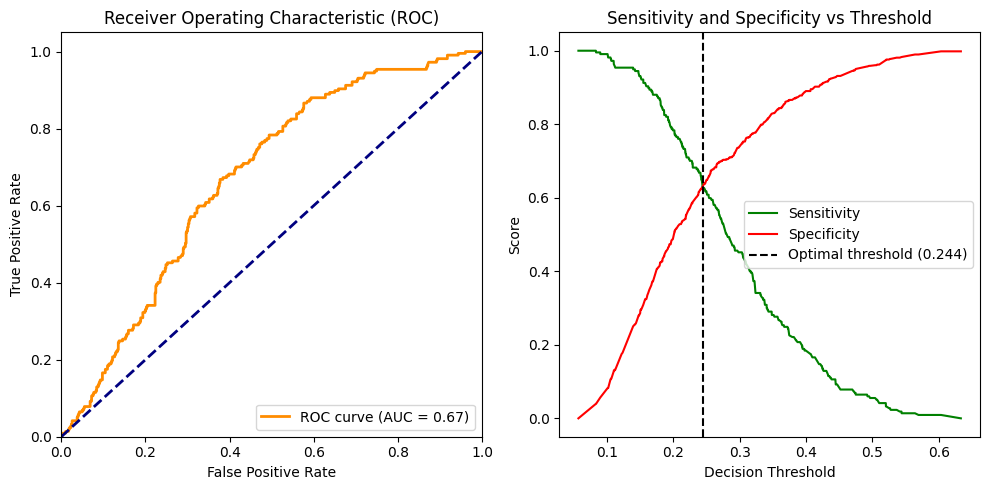

Optimal threshold: 0.244
At this threshold:
Sensitivity: 0.631
Specificity: 0.630


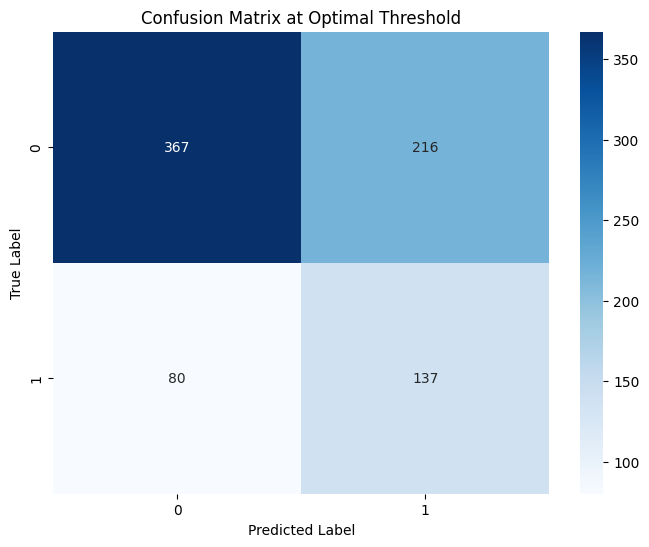

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6
Lift Chart for Logistic Regression Model:

Logistic Regression Lift Chart Data:


,Lift Curve,Baseline,Cumulative Lift,Incremental Lift
0,0.0,0.0,0.0,0.0
1,15.9,10.0,5.9,5.9
2,31.6,20.0,11.6,5.7
3,46.2,30.0,16.2,4.6
4,61.2,40.0,21.2,5.0
5,71.6,50.0,21.6,0.4
6,79.0,60.0,19.0,-2.6
7,85.8,70.0,15.8,-3.2
8,91.8,80.0,11.8,-4.0
9,97.3,90.0,7.3,-4.5


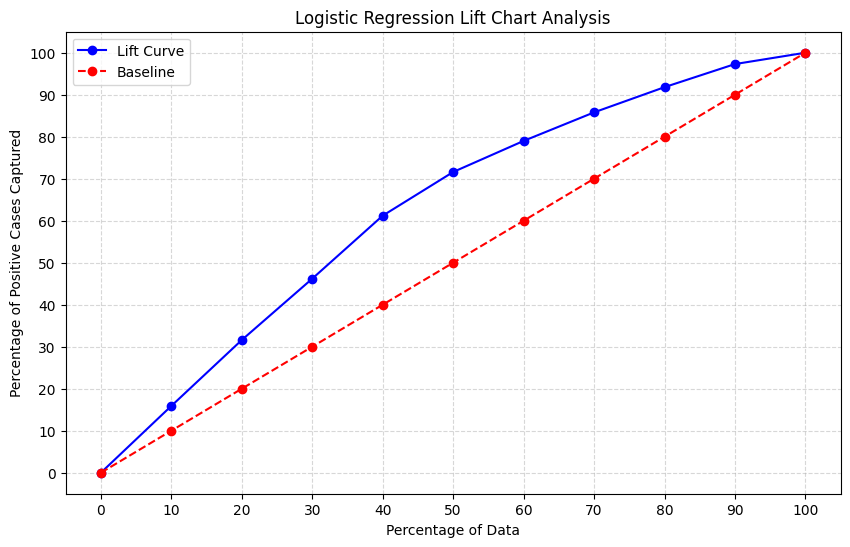

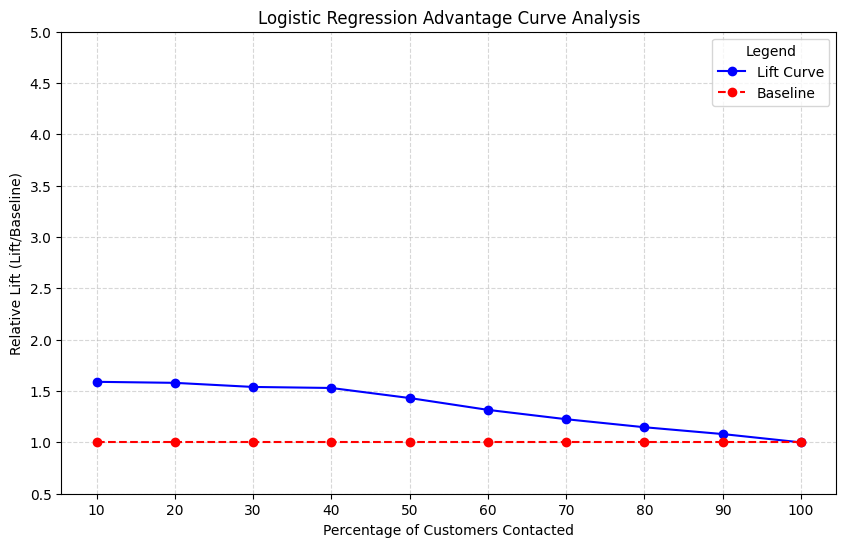


Top rows of sorted data (by predicted probabilities):


,id,age,dist,income,gender,marital_status,target,predicted_probs
3917,3918,94,1,2,1,1,0,0.648670
2393,2394,94,2,2,1,1,1,0.645755
442,443,94,3,2,1,1,1,0.642830
862,863,90,2,1,1,1,0,0.628367
460,461,92,1,2,1,1,1,0.627109



Top rows of shuffled data (random order):


,id,age,dist,income,gender,marital_status,target,predicted_probs
0,556,77,5,11,0,0,0,0.111251
1,3492,82,3,11,1,1,1,0.273661
2,528,80,3,11,0,1,0,0.186317
3,3926,73,1,3,1,0,0,0.285578
4,2990,69,5,2,1,1,0,0.353224


In [107]:
# LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prepare features (X) and target (y)
X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

# Add a constant (intercept) to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()

# Get predictions for test set
y_pred_proba = model.predict(X_test)

# Print model parameters including intercept
print("Model Summary:")
print(model.summary())

# Calculate and print the model accuracy
train_accuracy = (model.predict(X_train) > 0.5).mean()
test_accuracy = (y_pred_proba > 0.5).mean()

print(f"\nTraining Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate sensitivity and specificity for different thresholds
sensitivity = tpr
specificity = 1 - fpr

# Find optimal threshold where sensitivity and specificity are closest
differences = np.abs(sensitivity - specificity)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")

# Plot sensitivity/specificity vs threshold
ax2.plot(thresholds, sensitivity, label='Sensitivity', color='green')
ax2.plot(thresholds, specificity, label='Specificity', color='red')
ax2.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Optimal threshold ({optimal_threshold:.3f})')
ax2.set_xlabel('Decision Threshold')
ax2.set_ylabel('Score')
ax2.set_title('Sensitivity and Specificity vs Threshold')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At this threshold:")
print(f"Sensitivity: {sensitivity[optimal_idx]:.3f}")
print(f"Specificity: {specificity[optimal_idx]:.3f}")

# Get predictions using optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix at Optimal Threshold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Train model and get predictions for lift chart
predictors = ['age', 'income', 'dist', 'gender', 'marital_status']

# Split data into training and test sets
X = data[predictors]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model_full = sm.Logit(y, sm.add_constant(X)).fit()

# Predict probabilities for the entire dataset
data['predicted_probs'] = model_full.predict(sm.add_constant(X))

# Sort and shuffle data
data_sorted_lr = data.sort_values(by='predicted_probs', ascending=False)
data_shuffled_lr = data.sample(frac=1, random_state=42).reset_index(drop=True)

def lift_chart(sorted_data, shuffled_data):
    """
    Computes and plots the lift chart comparing sorted vs shuffled data
    
    Parameters:
    - sorted_data: DataFrame sorted by predicted probabilities
    - shuffled_data: DataFrame in random order
    """
    # Calculate cumulative positives at each decile
    total_positives = sorted_data['target'].sum()
    n_rows = len(sorted_data)
    
    lift_curve = []
    baseline_curve = []
    incremental_lift = []
    
    prev_lift = 0
    prev_baseline = 0
    
    for i in range(11):
        cutoff = int((i/10) * n_rows)
        
        # Lift curve from sorted data
        lift_percentage = sorted_data.iloc[:cutoff]['target'].sum() / total_positives * 100
        lift_curve.append(lift_percentage)
        
        # Baseline from shuffled data 
        baseline_percentage = (i/10) * 100
        baseline_curve.append(baseline_percentage)
        
        # Calculate incremental lift for this decile
        current_lift = lift_percentage - prev_lift
        current_baseline = baseline_percentage - prev_baseline
        incremental_lift.append(current_lift - current_baseline)
        
        prev_lift = lift_percentage
        prev_baseline = baseline_percentage
    
    # Create results DataFrame
    lift_data = pd.DataFrame({
        'Lift Curve': lift_curve,
        'Baseline': baseline_curve,
        'Cumulative Lift': np.array(lift_curve) - np.array(baseline_curve),
        'Incremental Lift': incremental_lift
    })
    
    print("\nLogistic Regression Lift Chart Data:")
    display(lift_data)
    
    # Plot lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 100, 11), lift_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(0, 100, 11), lift_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Logistic Regression Lift Chart Analysis')
    plt.xlabel('Percentage of Data')
    plt.ylabel('Percentage of Positive Cases Captured')
    plt.xticks(np.linspace(0, 100, 11))
    plt.yticks(np.linspace(0, 100, 11))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # Calculate and plot advantage curve
    advantage_data = lift_data.copy()
    advantage_data['Lift Curve'] = advantage_data['Lift Curve'] / advantage_data['Baseline']
    advantage_data['Baseline'] = advantage_data['Baseline'] / advantage_data['Baseline']
    advantage_data = advantage_data.iloc[1:] # Remove first row to avoid division by zero
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(10, 100, 10), advantage_data['Lift Curve'],
             label='Lift Curve', color='blue', marker='o')
    plt.plot(np.linspace(10, 100, 10), advantage_data['Baseline'],
             label='Baseline', color='red', linestyle='--', marker='o')
    
    plt.title('Logistic Regression Advantage Curve Analysis')
    plt.xlabel('Percentage of Customers Contacted')
    plt.ylabel('Relative Lift (Lift/Baseline)')
    plt.xticks(np.linspace(10, 100, 10))
    plt.ylim(0.5, 5)
    plt.legend(title='Legend')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    return lift_data

# Generate lift chart
print("Lift Chart for Logistic Regression Model:")
lift_data_lr = lift_chart(data_sorted_lr, data_shuffled_lr)

print("\nTop rows of sorted data (by predicted probabilities):")
display(data_sorted_lr.head())

print("\nTop rows of shuffled data (random order):")
display(data_shuffled_lr.head())

Optimization terminated successfully.
         Current function value: 0.542901
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539265
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541956
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547609
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559628
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560484
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.545148
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543849
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558019
  

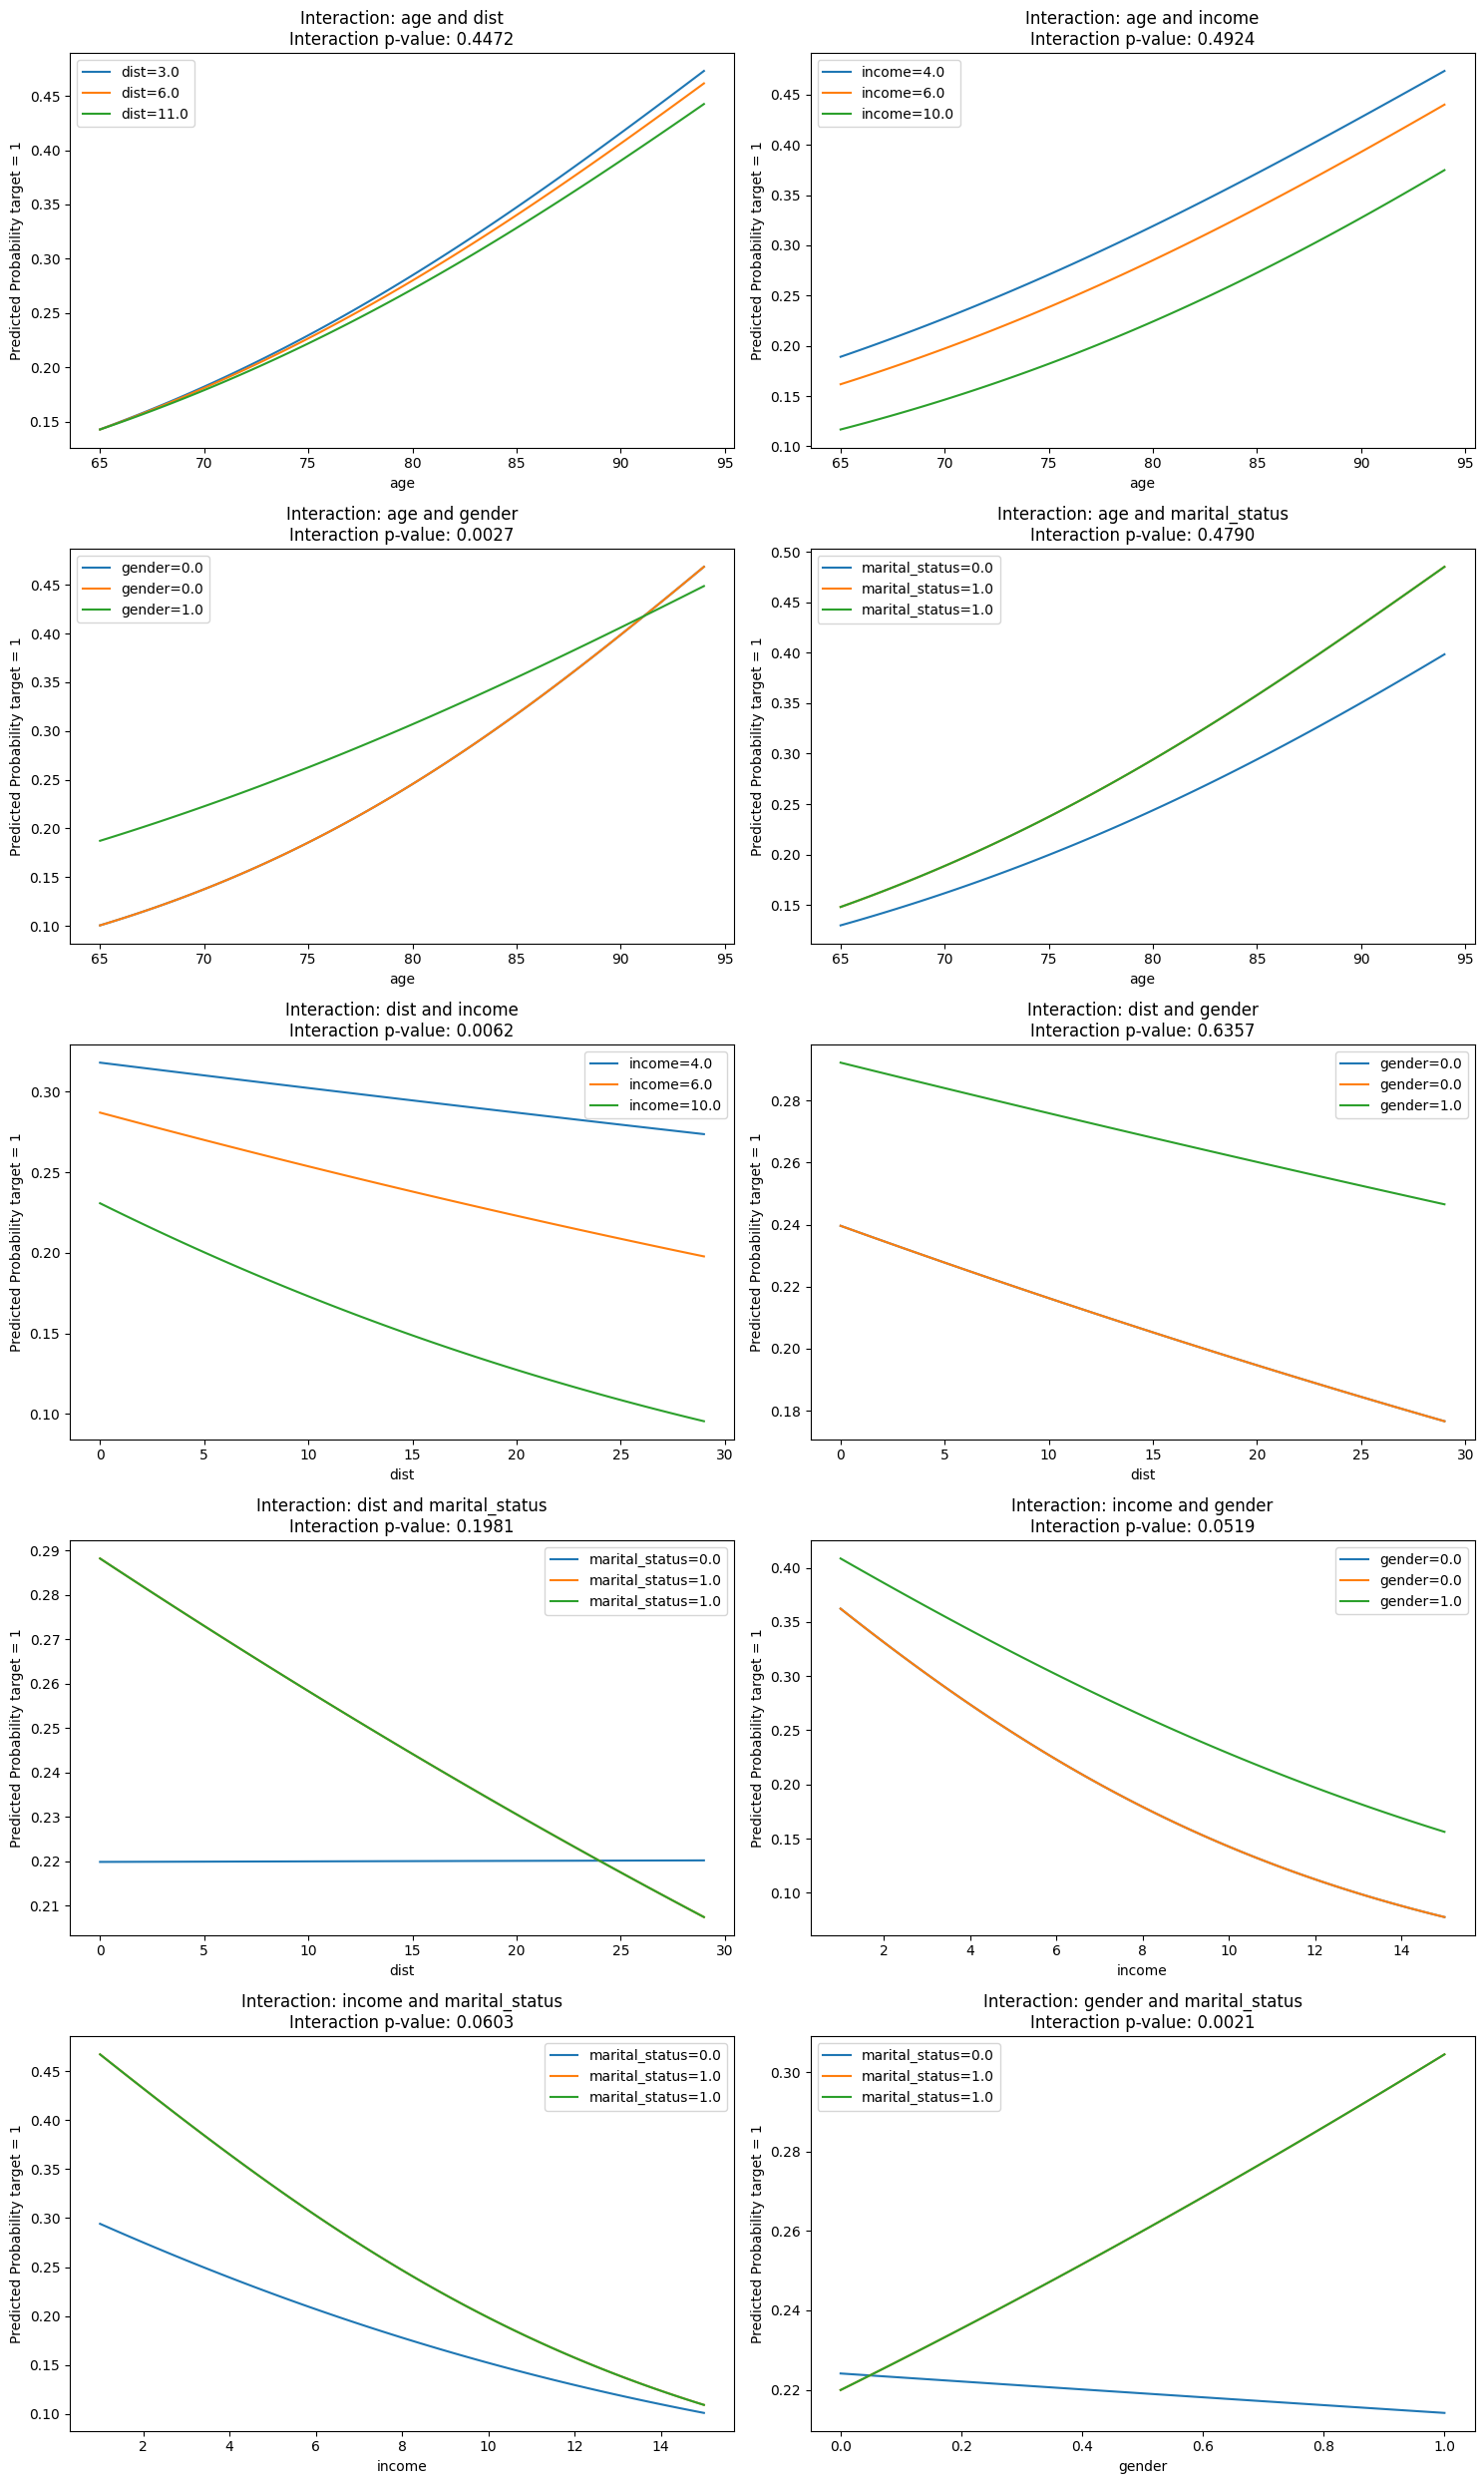


Significant interactions (p < 0.05):
age x gender
dist x income
gender x marital_status


In [108]:
variables = ['age', 'dist', 'income', 'gender', 'marital_status']

n_pairs = len(variables) * (len(variables) - 1) // 2
n_rows = (n_pairs + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes = axes.flatten()

significant_interactions = []
plot_idx = 0

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables[i+1:], i+1):
        formula = f'target ~ {var1} * {var2}'
        model = sm.Logit.from_formula(formula, data=data).fit()
        
        interaction_pvalue = model.pvalues[f'{var1}:{var2}']
        
        if interaction_pvalue < 0.05:
            significant_interactions.append((var1, var2))
        
        var1_values = np.linspace(data[var1].min(), data[var1].max(), 100)
        var2_levels = np.percentile(data[var2], [25, 50, 75])
        
        for var2_level in var2_levels:
            df = pd.DataFrame({
                var1: var1_values,
                var2: var2_level
            })
            df['interaction'] = df[var1] * df[var2]
            df['predicted_prob'] = model.predict(sm.add_constant(df))
            
            axes[plot_idx].plot(df[var1], df['predicted_prob'], 
                              label=f'{var2}={var2_level:.1f}')
        
        axes[plot_idx].set_xlabel(var1)
        axes[plot_idx].set_ylabel('Predicted Probability target = 1')
        axes[plot_idx].legend()
        axes[plot_idx].set_title(f'Interaction: {var1} and {var2}\nInteraction p-value: {interaction_pvalue:.4f}')
        plot_idx += 1

for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("\nSignificant interactions (p < 0.05):")
for var1, var2 in significant_interactions:
    print(f"{var1} x {var2}")


The additon of interaction terms to the model did not improve the model performance.

# Logistic Regression Performance.

The most important performance metric for in this context is our lift chart. We want to yeild the most customer responses while sampling the least percentage of potential customers. 
The logistic regression model obtained 70% of the totall responses from potential customers upon sampling 50% of them. This is very poor, as if we had sampled customers randomly we would have obtained 50% of the totall responses upon sampling 50% of them.

This performance metric is independent of decision threshold chosen, as the customers are sampled simply in order of greated predicted probability of response to least.

This is indicative of the models poor ability to predict posative responses.

# Evaluate Random Forest

Training Accuracy: 0.973
Testing Accuracy: 0.680


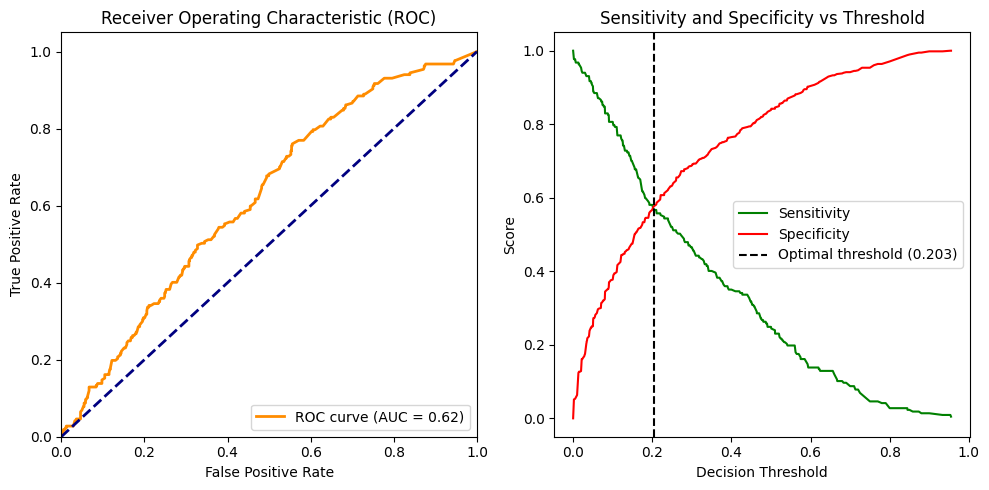

Optimal threshold: 0.203
At this threshold:
Sensitivity: 0.567
Specificity: 0.576


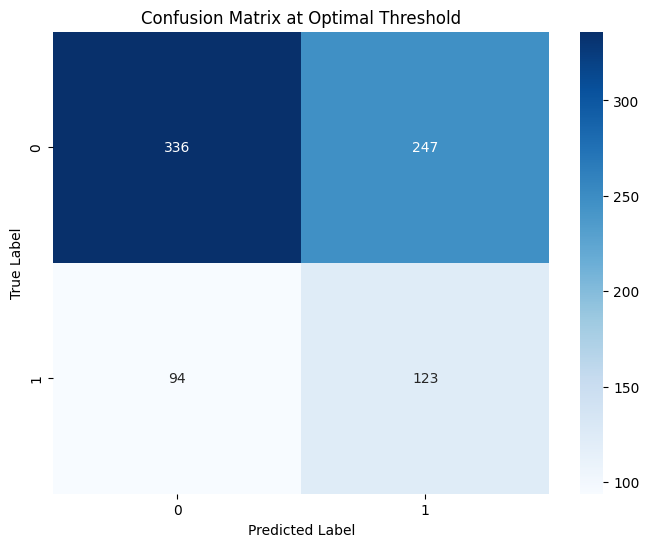


Random Forest Lift Chart Data:


,Lift Curve,Baseline,Cumulative Lift,Incremental Lift
0,0.0,0.0,0.0,0.0
1,37.3,10.0,27.3,27.3
2,72.9,20.0,52.9,25.6
3,88.7,30.0,58.7,5.8
4,92.2,40.0,52.2,-6.5
5,95.0,50.0,45.0,-7.2
6,96.7,60.0,36.7,-8.3
7,98.1,70.0,28.1,-8.6
8,98.8,80.0,18.8,-9.3
9,99.3,90.0,9.3,-9.5


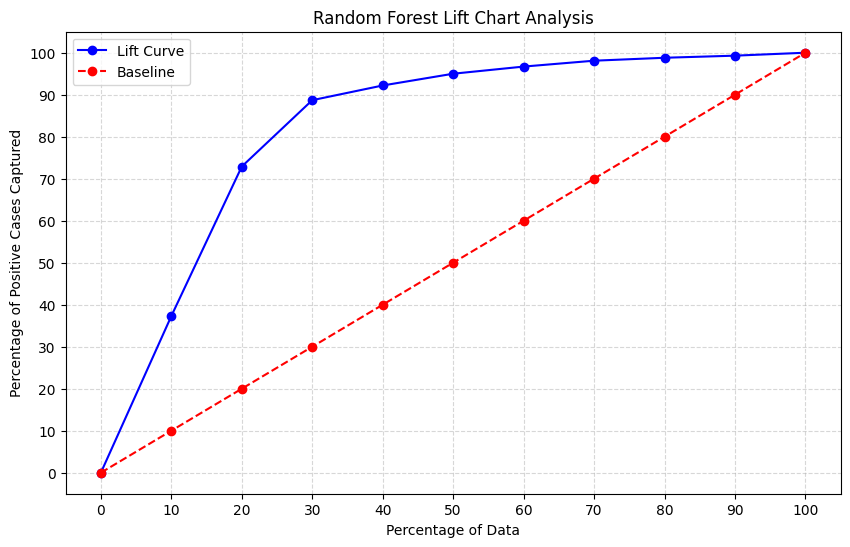

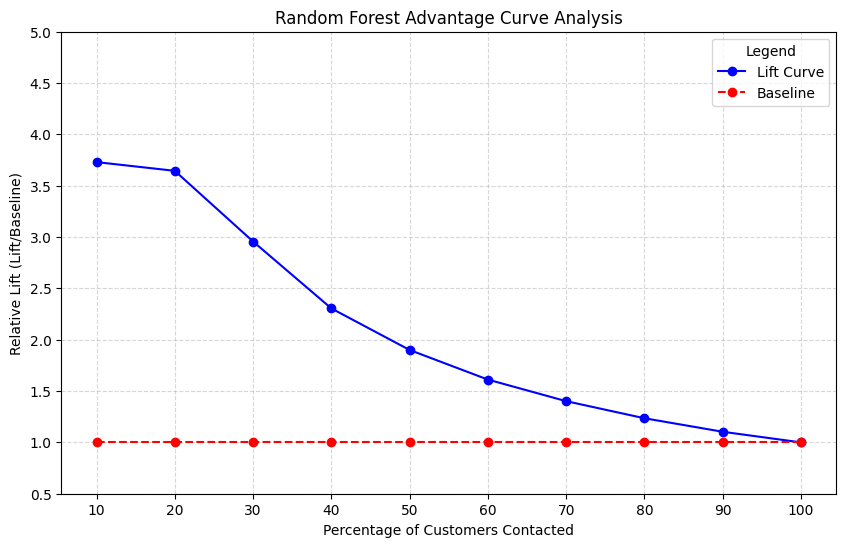


Top rows of sorted data (by predicted probabilities):


,id,age,dist,income,gender,marital_status,target,predicted_probs
585,586,80,16,4,1,1,1,0.99
1804,1805,80,16,4,1,1,1,0.99
2726,2727,79,0,2,0,1,1,0.98
171,172,77,5,11,1,1,1,0.98
702,703,85,2,10,1,1,1,0.98



Top rows of shuffled data (random order):


,id,age,dist,income,gender,marital_status,target,predicted_probs
0,556,77,5,11,0,0,0,0.080
1,3492,82,3,11,1,1,1,0.060
2,528,80,3,11,0,1,0,0.160
3,3926,73,1,3,1,0,0,0.255
4,2990,69,5,2,1,1,0,0.285


In [109]:
# 1. Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare features (X) and target (y)
X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate and print model accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# 2. ROC Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate sensitivity and specificity
sensitivity = tpr
specificity = 1 - fpr

# Find optimal threshold
differences = np.abs(sensitivity - specificity)
optimal_idx = np.argmin(differences)
optimal_threshold = thresholds[optimal_idx]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC)')
ax1.legend(loc="lower right")

# Plot sensitivity/specificity vs threshold
ax2.plot(thresholds, sensitivity, label='Sensitivity', color='green')
ax2.plot(thresholds, specificity, label='Specificity', color='red')
ax2.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Optimal threshold ({optimal_threshold:.3f})')
ax2.set_xlabel('Decision Threshold')
ax2.set_ylabel('Score')
ax2.set_title('Sensitivity and Specificity vs Threshold')
ax2.legend()

plt.tight_layout()
plt.show()

# 3. Print threshold metrics and confusion matrix
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"At this threshold:")
print(f"Sensitivity: {sensitivity[optimal_idx]:.3f}")
print(f"Specificity: {specificity[optimal_idx]:.3f}")

# Get predictions using optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix at Optimal Threshold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Lift Chart and Advantage Curve
# Get predictions for entire dataset
data['predicted_probs'] = rf_model.predict_proba(X)[:, 1]

# Sort and shuffle data
data_sorted = data.sort_values(by='predicted_probs', ascending=False)
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate lift chart data
total_positives = data_sorted['target'].sum()
n_rows = len(data_sorted)

lift_curve = []
baseline_curve = []
incremental_lift = []
prev_lift = 0

for i in range(11):
    cutoff = int((i/10) * n_rows)
    lift_percentage = data_sorted.iloc[:cutoff]['target'].sum() / total_positives * 100
    baseline_percentage = (i/10) * 100
    lift_curve.append(lift_percentage)
    baseline_curve.append(baseline_percentage)
    
    current_lift = lift_percentage - baseline_percentage
    if i > 0:
        incremental = current_lift - prev_lift
    else:
        incremental = current_lift
    incremental_lift.append(incremental)
    prev_lift = current_lift

# Create lift chart DataFrame
lift_data = pd.DataFrame({
    'Lift Curve': lift_curve,
    'Baseline': baseline_curve,
    'Cumulative Lift': np.array(lift_curve) - np.array(baseline_curve),
    'Incremental Lift': incremental_lift
})

# Display lift chart data table
print("\nRandom Forest Lift Chart Data:")
display(lift_data)

# Plot lift chart
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 100, 11), lift_data['Lift Curve'],
         label='Lift Curve', color='blue', marker='o')
plt.plot(np.linspace(0, 100, 11), lift_data['Baseline'],
         label='Baseline', color='red', linestyle='--', marker='o')

plt.title('Random Forest Lift Chart Analysis')
plt.xlabel('Percentage of Data')
plt.ylabel('Percentage of Positive Cases Captured')
plt.xticks(np.linspace(0, 100, 11))
plt.yticks(np.linspace(0, 100, 11))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot advantage curve
advantage_data = lift_data.copy()
advantage_data['Lift Curve'] = advantage_data['Lift Curve'] / advantage_data['Baseline']
advantage_data['Baseline'] = advantage_data['Baseline'] / advantage_data['Baseline']
advantage_data = advantage_data.iloc[1:] # Remove first row to avoid division by zero

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(10, 100, 10), advantage_data['Lift Curve'],
         label='Lift Curve', color='blue', marker='o')
plt.plot(np.linspace(10, 100, 10), advantage_data['Baseline'],
         label='Baseline', color='red', linestyle='--', marker='o')

plt.title('Random Forest Advantage Curve Analysis')
plt.xlabel('Percentage of Customers Contacted')
plt.ylabel('Relative Lift (Lift/Baseline)')
plt.xticks(np.linspace(10, 100, 10))
plt.ylim(0.5, 5)
plt.legend(title='Legend')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Display preview of sorted and shuffled data
print("\nTop rows of sorted data (by predicted probabilities):")
display(data_sorted.head())

print("\nTop rows of shuffled data (random order):")
display(data_shuffled.head())

### good performance 

Within sampling only 30% of potential customers, Random Forest obtained 90% of totall customer responses.

### Why did Logistic Reggression perform so poorly and Random Forest Perform so well 

What can we learn about Logstics Regression from answering this and what are implications for best practises. 

## Examination of predictor variables

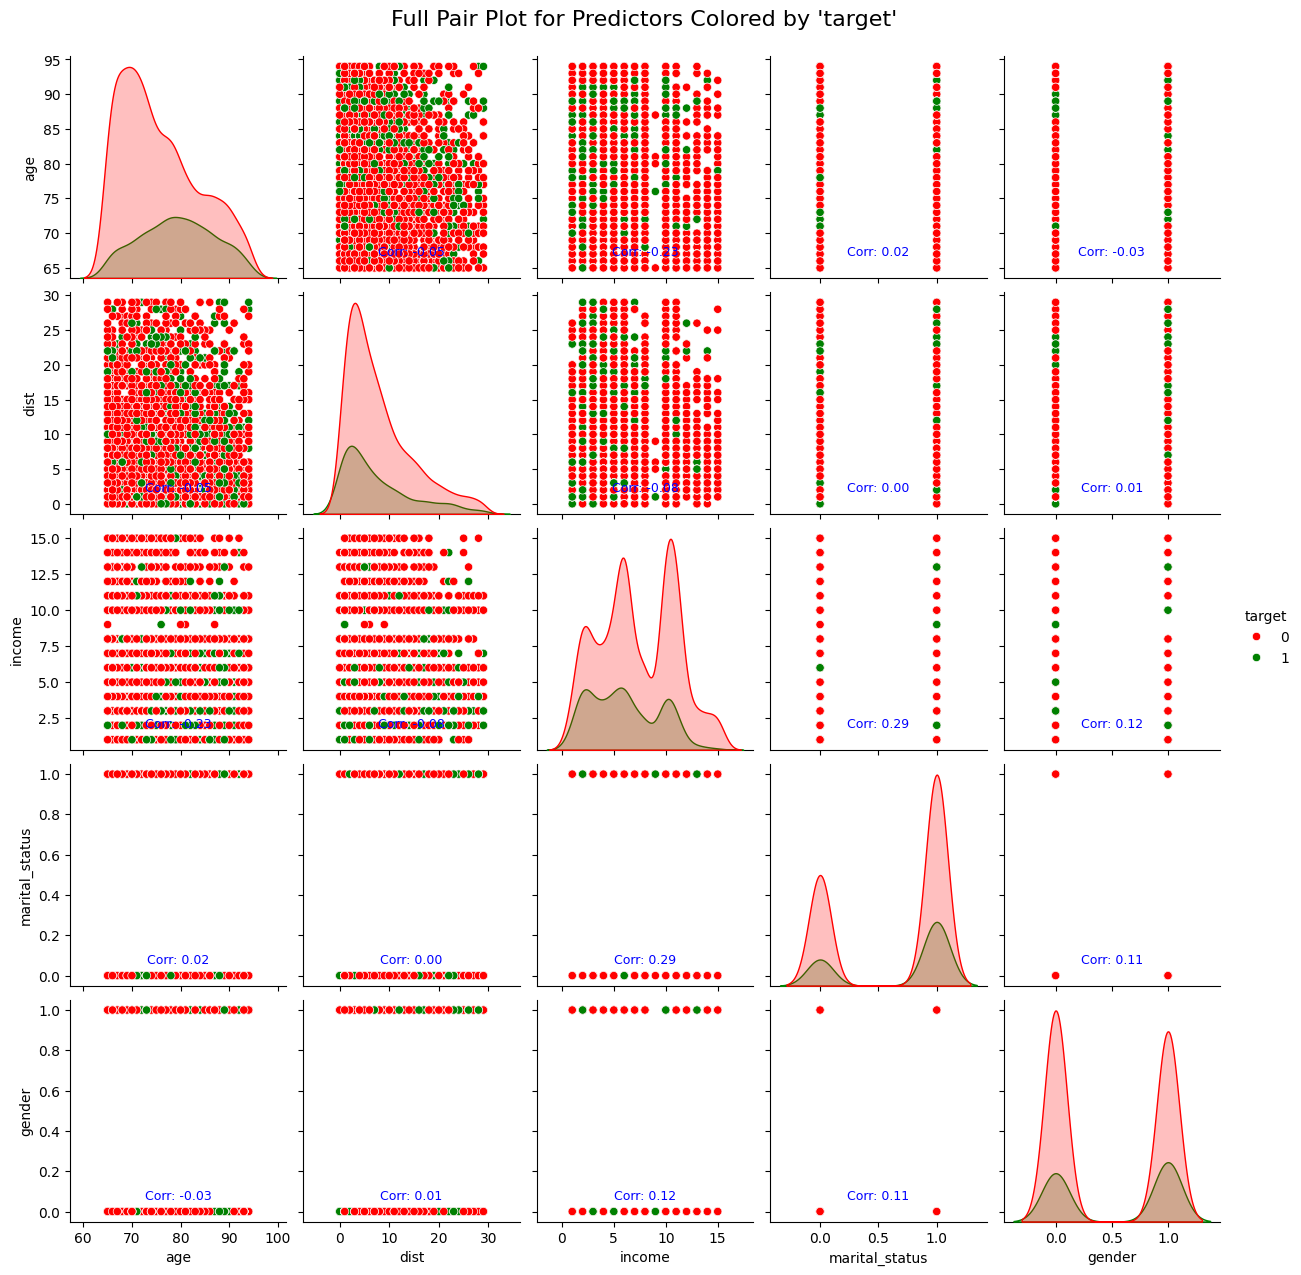

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_full_pairplot_with_corr_binary_target(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate a Seaborn pair plot with correlation coefficients annotated on the scatter plots,
    showing a full matrix, and color-coded by a binary target variable.

    Parameters:
    - df: DataFrame containing the data.
    - continuous_vars: List of continuous variable column names.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Filter DataFrame for the required columns
    pairplot_data = df[continuous_vars + [target_var]].copy()
    
    # Ensure the target variable is categorical for coloring
    pairplot_data[target_var] = pairplot_data[target_var].astype('category')
    
    # Calculate pairwise correlations
    correlation_matrix = pairplot_data[continuous_vars].corr()
    
    # Create the pair plot
    g = sns.pairplot(
        pairplot_data,
        hue=target_var,
        palette={positive_value: 'green', negative_value: 'red'},
        diag_kind='kde',
        corner=False  # Full matrix
    )
    
    # Annotate correlation coefficients
    for i, row_var in enumerate(continuous_vars):
        for j, col_var in enumerate(continuous_vars):
            if i != j:  # Skip diagonal
                # Get the current axis
                ax = g.axes[i, j]
                # Get the correlation value
                corr = correlation_matrix.loc[row_var, col_var]
                # Annotate the correlation on the scatter plot
                ax.annotate(
                    f"Corr: {corr:.2f}",
                    xy=(0.5, 0.1),
                    xycoords="axes fraction",
                    ha="center",
                    fontsize=9,
                    color="blue"
                )
    
    # Add a title for context
    plt.suptitle(f"Full Pair Plot for Predictors Colored by '{target_var}'", y=1.02, fontsize=16)
    plt.show()

# Continuous variables and target variable
continuous_vars = ['age', 'dist', 'income', 'marital_status', 'gender']
target_var = 'target'

# Call the function with the DataFrame
plot_full_pairplot_with_corr_binary_target(data, continuous_vars, target_var, positive_value=1, negative_value=0)

1. The plots off the main diagonals are scatterplots of the predictor variables with green dots coresponding to posative outcomes of the variable pair within observations and red dots for negative outcomes. Within these scatterplots we fail to see a clear pattern in the responses coresponding to the combinations of pairs of 2 of the continuous predictors. 

2. Across the diagnonal are the density curves of the predictor variables stratified by the values which corespond to posative or negative respones within observations. In visual examination of the density curves divided by posative and negative outocomes, signifigant differences between the two outcome groups density curves are not evident for variables gender, marital status, and distance.

3. only within the density plots of age and income do we see signifigant difference in the values corespsonging to different outcomes. Thus these will be out two strongest predictors of posative outcome. 

# distributions stratified by outcome

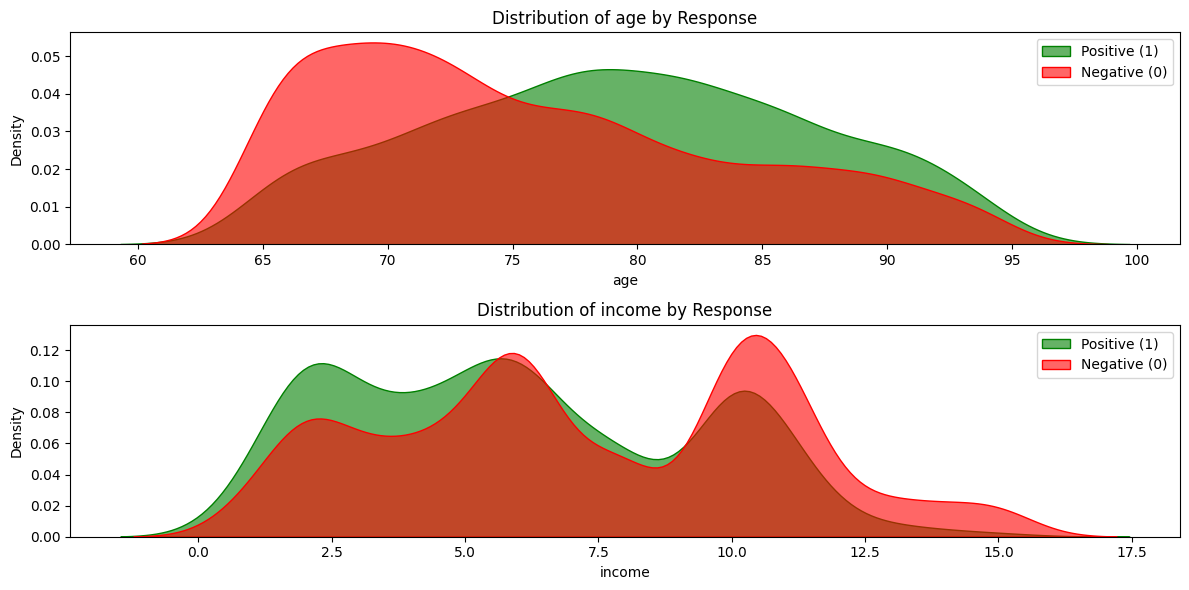

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ridge_plot_by_response(df, variables, categorical_var='target', positive_value=1, negative_value=0):
    """
    Create ridge line plots for variables showing the distribution for positive and negative responses.
    
    Parameters:
    - df: DataFrame containing the data.
    - variables: List of continuous variables to plot.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Create the ridge plot for each variable
    plt.figure(figsize=(12, 6))
    
    for i, var in enumerate(variables):
        plt.subplot(2, 1, i + 1)
        
        # Positive responses
        sns.kdeplot(data=df[df[categorical_var] == positive_value], x=var, 
                    fill=True, alpha=0.6, label=f'Positive ({positive_value})', color='green')
        
        # Negative responses
        sns.kdeplot(data=df[df[categorical_var] == negative_value], x=var, 
                    fill=True, alpha=0.6, label=f'Negative ({negative_value})', color='red')
        
        # Add plot details
        plt.title(f'Distribution of {var} by Response')
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
variables = ['age', 'income']
ridge_plot_by_response(data, variables, categorical_var='target', positive_value=1, negative_value=0)

The density curve is dependent upon sample size as well as proportion. To isolate the relationship between these variables and posative or negative outcomes, we plot the proportion of outcomes which were posative coresponding to each value of the predictor variables across the entire span of the data set. 

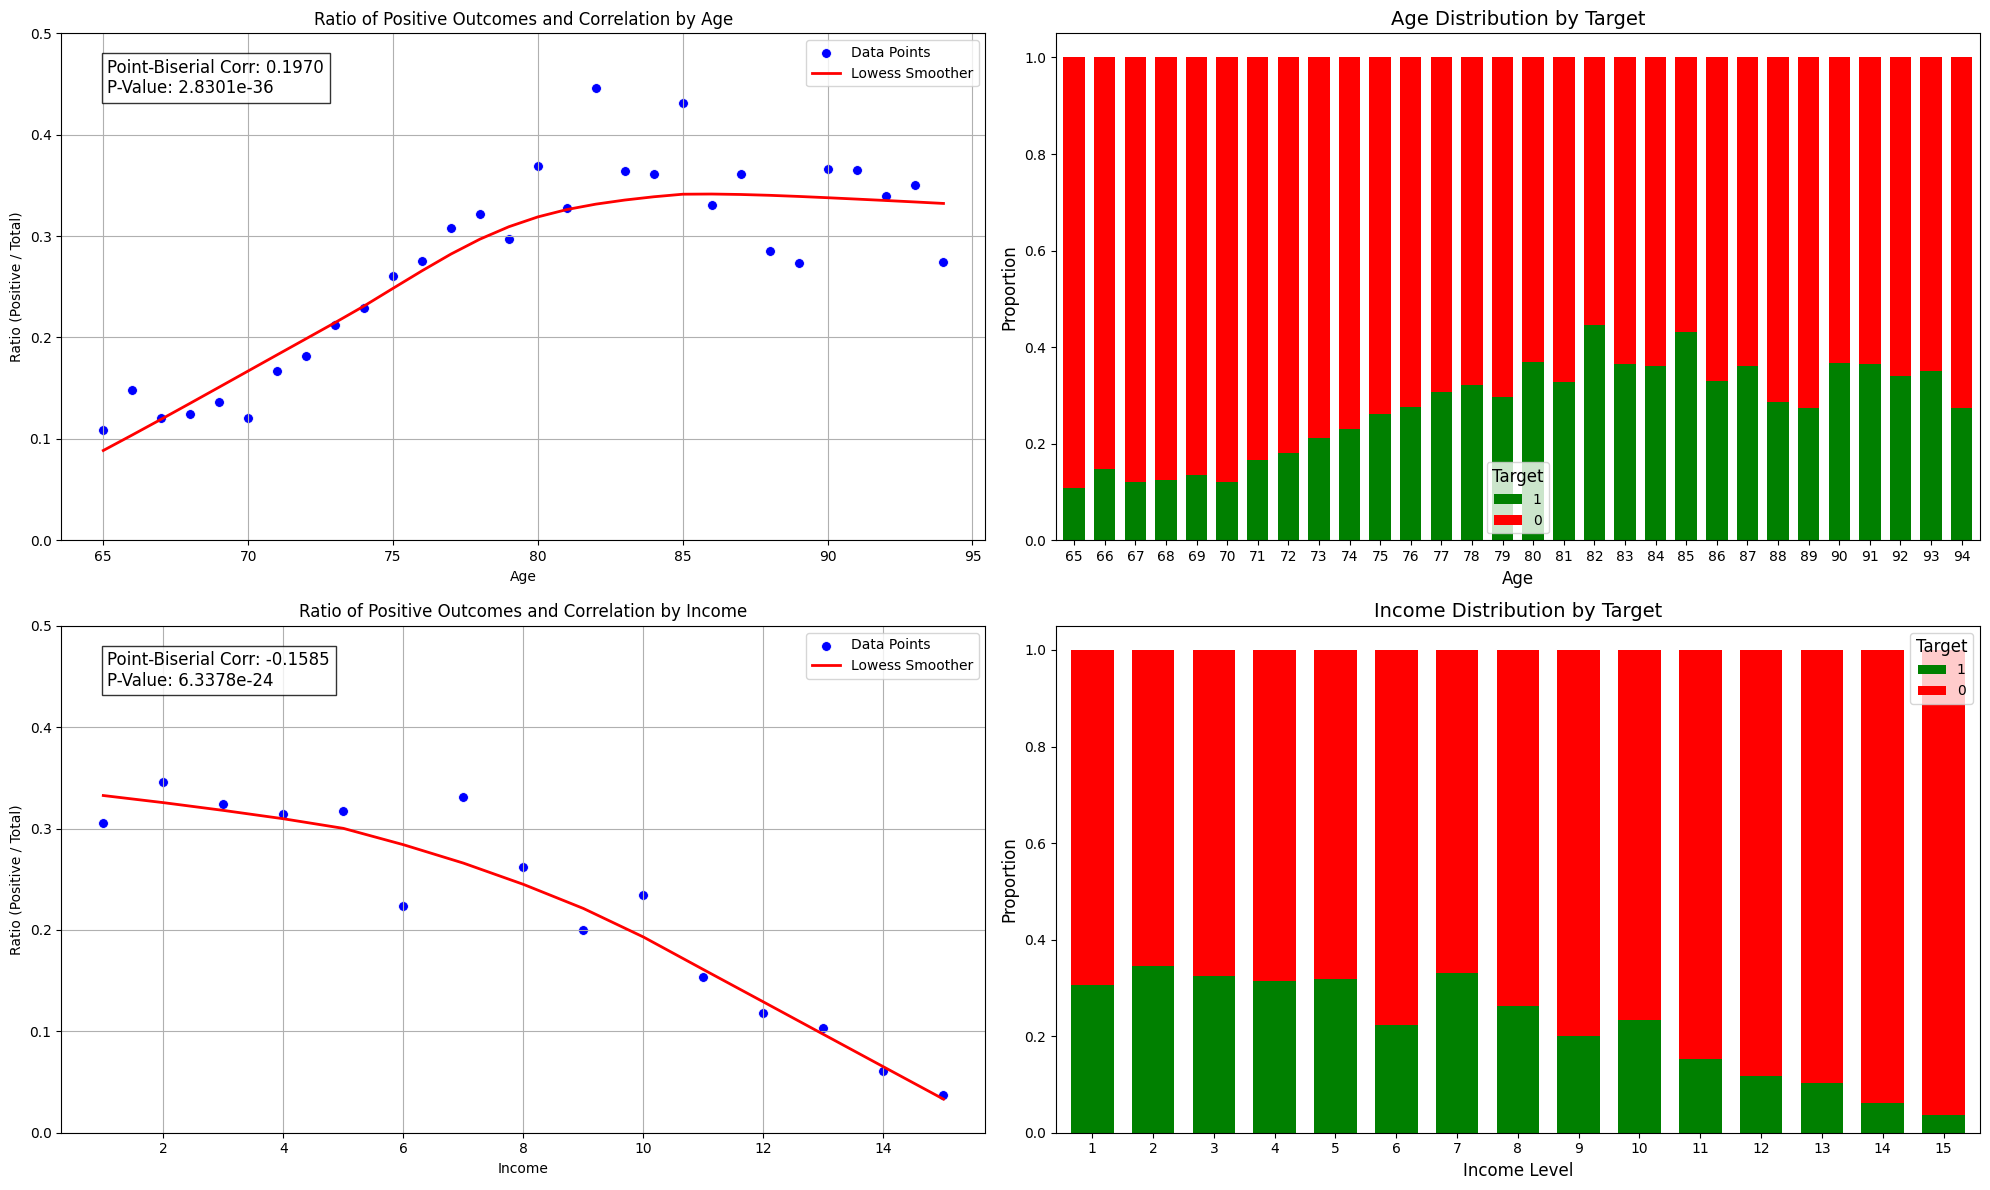

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

def plot_ratio_positive_negative_with_corr(df, continuous_var, categorical_var='target', positive_value=1, negative_value=0):
    """
    Plot the ratio of positive to total outcomes for a continuous variable with a smoother
    and display the correlation coefficient.
    
    Parameters:
    - df: DataFrame containing the data.
    - continuous_var: Name of the continuous predictor column.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Group by continuous variable and category to get counts
    grouped = df.groupby([continuous_var, categorical_var]).size().reset_index(name='count')
    
    # Pivot so we have positive and negative counts
    pivot = grouped.pivot(index=continuous_var, columns=categorical_var, values='count').fillna(0)
    
    # Extract positive and total counts
    positive_counts = pivot[positive_value] if positive_value in pivot.columns else 0
    total_counts = positive_counts + pivot[negative_value] if negative_value in pivot.columns else positive_counts

    # To avoid division by zero, add a small epsilon
    epsilon = 1e-9
    ratio = positive_counts / (total_counts + epsilon)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        continuous_var: ratio.index,
        'ratio_positive_negative': ratio.values
    })
    
    # Calculate Point-Biserial Correlation
    correlation, p_value = pointbiserialr(df[continuous_var], df[categorical_var])
    
    return plot_df, correlation, p_value

# Create figure with four subplots in 2x2 grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Top row - Age plots
# Left plot - Scatter plot with regression for age
age_plot_df, age_corr, age_p = plot_ratio_positive_negative_with_corr(data, 'age', 'target')

sns.scatterplot(x='age', y='ratio_positive_negative', data=age_plot_df, color='blue', s=50, label='Data Points', ax=ax1)
sns.regplot(x='age', y='ratio_positive_negative', data=age_plot_df, 
            scatter=False, lowess=True, color='red', line_kws={'lw': 2}, label='Lowess Smoother', ax=ax1)

ax1.text(0.05, 0.95, f'Point-Biserial Corr: {age_corr:.4f}\nP-Value: {age_p:.4e}', 
         transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
ax1.set_title('Ratio of Positive Outcomes and Correlation by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Ratio (Positive / Total)')
ax1.set_ylim(0, 0.50)
ax1.legend()
ax1.grid()

# Right plot - Bar chart for age
age_proportions = (
    data.groupby(["age", "target"])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)

age_proportions[[1, 0]].plot(
    kind="bar",
    stacked=True,
    ax=ax2,
    width=0.7,
    legend=True,
    color=['green', 'red']
)

ax2.set_title("Age Distribution by Target", fontsize=14)
ax2.set_ylabel("Proportion", fontsize=12)
ax2.set_xlabel("Age", fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')
ax2.legend(title="Target", title_fontsize=12, fontsize=10)

# Bottom row - Income plots
# Left plot - Scatter plot with regression for income
income_plot_df, income_corr, income_p = plot_ratio_positive_negative_with_corr(data, 'income', 'target')

sns.scatterplot(x='income', y='ratio_positive_negative', data=income_plot_df, color='blue', s=50, label='Data Points', ax=ax3)
sns.regplot(x='income', y='ratio_positive_negative', data=income_plot_df, 
            scatter=False, lowess=True, color='red', line_kws={'lw': 2}, label='Lowess Smoother', ax=ax3)

ax3.text(0.05, 0.95, f'Point-Biserial Corr: {income_corr:.4f}\nP-Value: {income_p:.4e}', 
         transform=ax3.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
ax3.set_title('Ratio of Positive Outcomes and Correlation by Income')
ax3.set_xlabel('Income')
ax3.set_ylabel('Ratio (Positive / Total)')
ax3.set_ylim(0, 0.50)
ax3.legend()
ax3.grid()

# Right plot - Bar chart for income
income_proportions = (
    data.groupby(["income", "target"])
    .size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)

income_proportions[[1, 0]].plot(
    kind="bar",
    stacked=True,
    ax=ax4,
    width=0.7,
    legend=True,
    color=['green', 'red']
)

ax4.set_title("Income Distribution by Target", fontsize=14)
ax4.set_ylabel("Proportion", fontsize=12)
ax4.set_xlabel("Income Level", fontsize=12)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0, ha='center')
ax4.legend(title="Target", title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()


Notice that the relationship between age and posative outcomes is not linear, there is a peak around 80 and subsueqently declines. 

It seems that proportion of posative outcomes declines steadily as income level increases.

# How Logistic Regresion models these relationships

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6


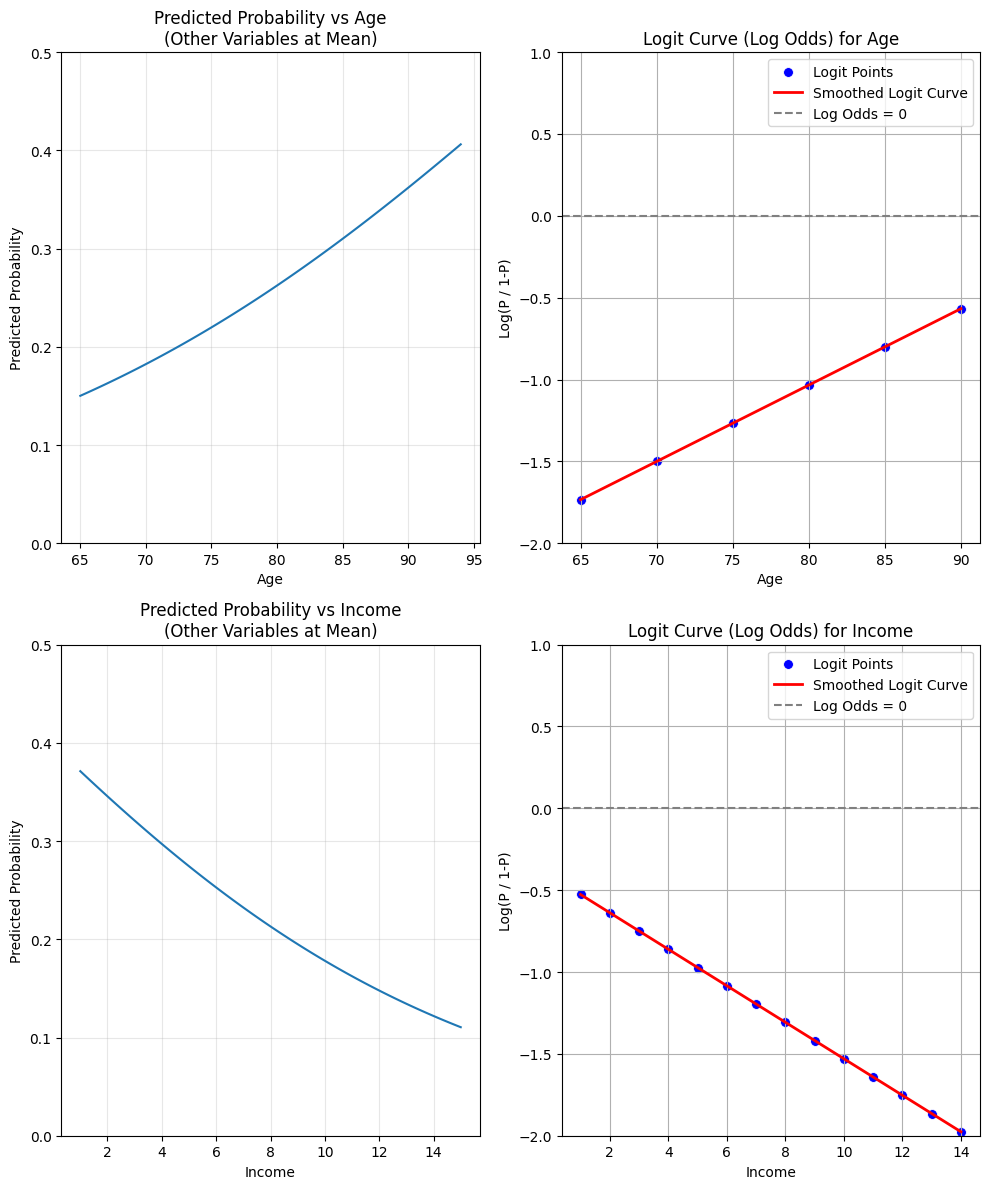

In [113]:
# Plot predicted probabilities and logit for age and income
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Prepare features and fit model
X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

# Fit logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X, y)

# Create figure with four subplots (2 rows, 2 columns)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))

# Get mean values for all predictors
mean_values = X.mean()

# Age plots
# Create range of values for age
x_range_age = np.linspace(X['age'].min(), X['age'].max(), 100)

# Create prediction data with all other variables at mean
pred_data_age = np.tile(mean_values, (100, 1))
pred_data_age = pd.DataFrame(pred_data_age, columns=X.columns)
pred_data_age['age'] = x_range_age

# Get predictions for age
y_pred_age = lr_model.predict_proba(pred_data_age)[:, 1]

# Plot predicted probabilities for age
ax1.plot(x_range_age, y_pred_age)
ax1.set_title('Predicted Probability vs Age\n(Other Variables at Mean)')
ax1.set_ylabel('Predicted Probability')
ax1.set_xlabel('Age')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 0.5)

# Age logit curve
# Fit statsmodels logistic regression
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Calculate logit values for age
feature_values_age = np.arange(X['age'].min(), X['age'].max(), 5)
fixed_predictors = mean_values.copy()
log_odds_age = []

for value in feature_values_age:
    temp_predictors = fixed_predictors.copy()
    temp_predictors['age'] = value
    predictors_with_const = sm.add_constant(temp_predictors.values.reshape(1, -1), has_constant='add')
    logit = np.dot(predictors_with_const, result.params)
    log_odds_age.append(logit[0])

# Create DataFrame for age plotting
plot_df_age = pd.DataFrame({
    'age': feature_values_age,
    'log_odds': log_odds_age
})

# Plot logit curve for age
sns.scatterplot(x='age', y='log_odds', data=plot_df_age, color='blue', s=50, ax=ax2, label='Logit Points')
sns.regplot(x='age', y='log_odds', data=plot_df_age, scatter=False, lowess=True, 
            color='red', line_kws={'lw': 2}, ax=ax2, label='Smoothed Logit Curve')

ax2.set_title('Logit Curve (Log Odds) for Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Log(P / 1-P)')
ax2.set_ylim(-2, 1)
ax2.axhline(0, color='grey', linestyle='--', label='Log Odds = 0')
ax2.legend()
ax2.grid(True)

# Income plots
# Create range of values for income
x_range_income = np.linspace(X['income'].min(), X['income'].max(), 100)

# Create prediction data with all other variables at mean
pred_data_income = np.tile(mean_values, (100, 1))
pred_data_income = pd.DataFrame(pred_data_income, columns=X.columns)
pred_data_income['income'] = x_range_income

# Get predictions for income
y_pred_income = lr_model.predict_proba(pred_data_income)[:, 1]

# Plot predicted probabilities for income
ax3.plot(x_range_income, y_pred_income)
ax3.set_title('Predicted Probability vs Income\n(Other Variables at Mean)')
ax3.set_ylabel('Predicted Probability')
ax3.set_xlabel('Income')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 0.5)

# Income logit curve
# Calculate logit values for income
feature_values_income = np.arange(X['income'].min(), X['income'].max(), 1)
fixed_predictors = mean_values.copy()
log_odds_income = []

for value in feature_values_income:
    temp_predictors = fixed_predictors.copy()
    temp_predictors['income'] = value
    predictors_with_const = sm.add_constant(temp_predictors.values.reshape(1, -1), has_constant='add')
    logit = np.dot(predictors_with_const, result.params)
    log_odds_income.append(logit[0])

# Create DataFrame for income plotting
plot_df_income = pd.DataFrame({
    'income': feature_values_income,
    'log_odds': log_odds_income
})

# Plot logit curve for income
sns.scatterplot(x='income', y='log_odds', data=plot_df_income, color='blue', s=50, ax=ax4, label='Logit Points')
sns.regplot(x='income', y='log_odds', data=plot_df_income, scatter=False, lowess=True, 
            color='red', line_kws={'lw': 2}, ax=ax4, label='Smoothed Logit Curve')

ax4.set_title('Logit Curve (Log Odds) for Income')
ax4.set_xlabel('Income')
ax4.set_ylabel('Log(P / 1-P)')
ax4.set_ylim(-2, 1)
ax4.axhline(0, color='grey', linestyle='--', label='Log Odds = 0')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

Just as as Linear Regression models response as a linear function of predictor, Logistic Regression models the log(ods) as a linear function of predictor.

Although there is no formal defiintion of linearity nor coorelation regarding a continuous and categorical variable, the plot of the proportion of responses which are posative by the predictor is a fair basis for qualitativly judging the strength of the relationship between the variable and posative outcome. 

Since income and age are our strongest predictors, what we would hope to see is a clear pattern of posative outcomes as age increases and income decreasing. Such a pattern is not visually evident and thus is not a good indicator of strength of association between these variables with respect to posative outcomes within individual observations. Of which Individual observations is what we are producing a probability of posative response for. 

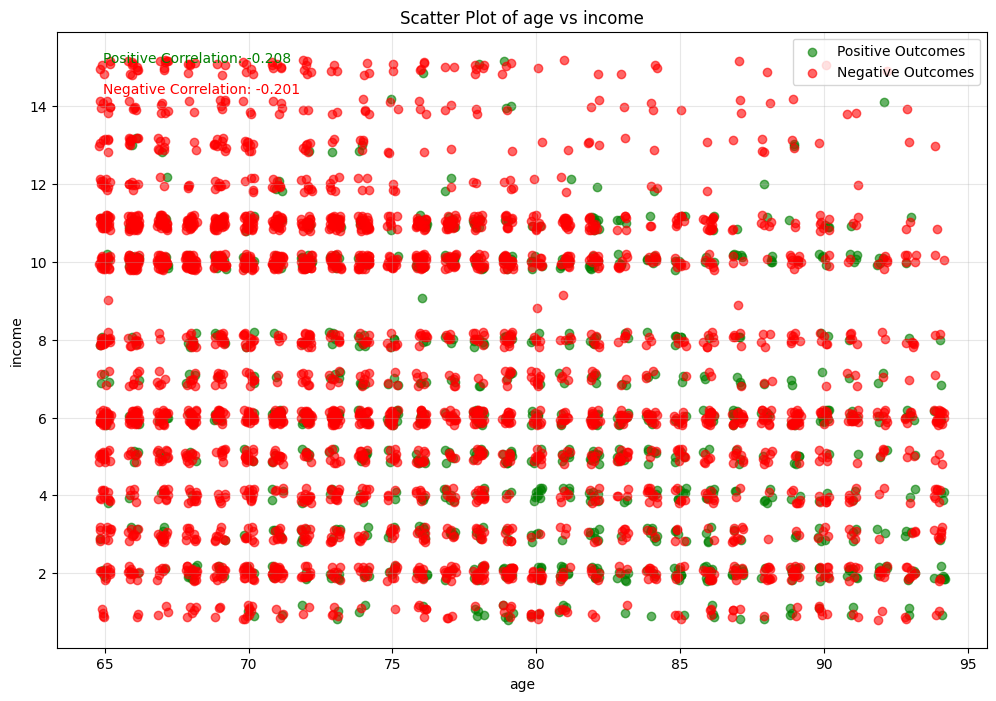

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_scatter_with_separate_correlations(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate scatter plots with separate correlation coefficients for positive and negative outcomes.
    Points are slightly offset when they overlap to show intersection.
    
    Parameters:
    - df: DataFrame containing the data
    - continuous_vars: List of continuous variable column names
    - target_var: Name of the binary target column (default='target')
    - positive_value: Value representing positive outcomes (default=1)
    - negative_value: Value representing negative outcomes (default=0)
    """
    # Create figure with subplots
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Split data into positive and negative outcomes
    positive_data = df[df[target_var] == positive_value]
    negative_data = df[df[target_var] == negative_value]
    
    # Calculate correlations for positive and negative outcomes
    pos_corr = positive_data[continuous_vars[0]].corr(positive_data[continuous_vars[1]])
    neg_corr = negative_data[continuous_vars[0]].corr(negative_data[continuous_vars[1]])
    
    # Add small random offset to points that overlap
    offset = 0.2
    pos_x = positive_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(positive_data))
    pos_y = positive_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(positive_data))
    neg_x = negative_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(negative_data))
    neg_y = negative_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(negative_data))
    
    # Create scatter plot with offset points
    plt.scatter(pos_x, pos_y, color='green', label='Positive Outcomes', alpha=0.6)
    plt.scatter(neg_x, neg_y, color='red', label='Negative Outcomes', alpha=0.6)
    
    # Add correlation annotations
    plt.text(0.05, 0.95, f'Positive Correlation: {pos_corr:.3f}',
             transform=ax.transAxes, color='green', fontsize=10)
    plt.text(0.05, 0.90, f'Negative Correlation: {neg_corr:.3f}',
             transform=ax.transAxes, color='red', fontsize=10)
    
    plt.title(f'Scatter Plot of {continuous_vars[0]} vs {continuous_vars[1]}')
    plt.xlabel(continuous_vars[0])
    plt.ylabel(continuous_vars[1])
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Continuous variables and target variable
continuous_vars = ['age', 'income']
target_var = 'target'

# Call the function with the DataFrame
plot_scatter_with_separate_correlations(data, continuous_vars, target_var, positive_value=1, negative_value=0)

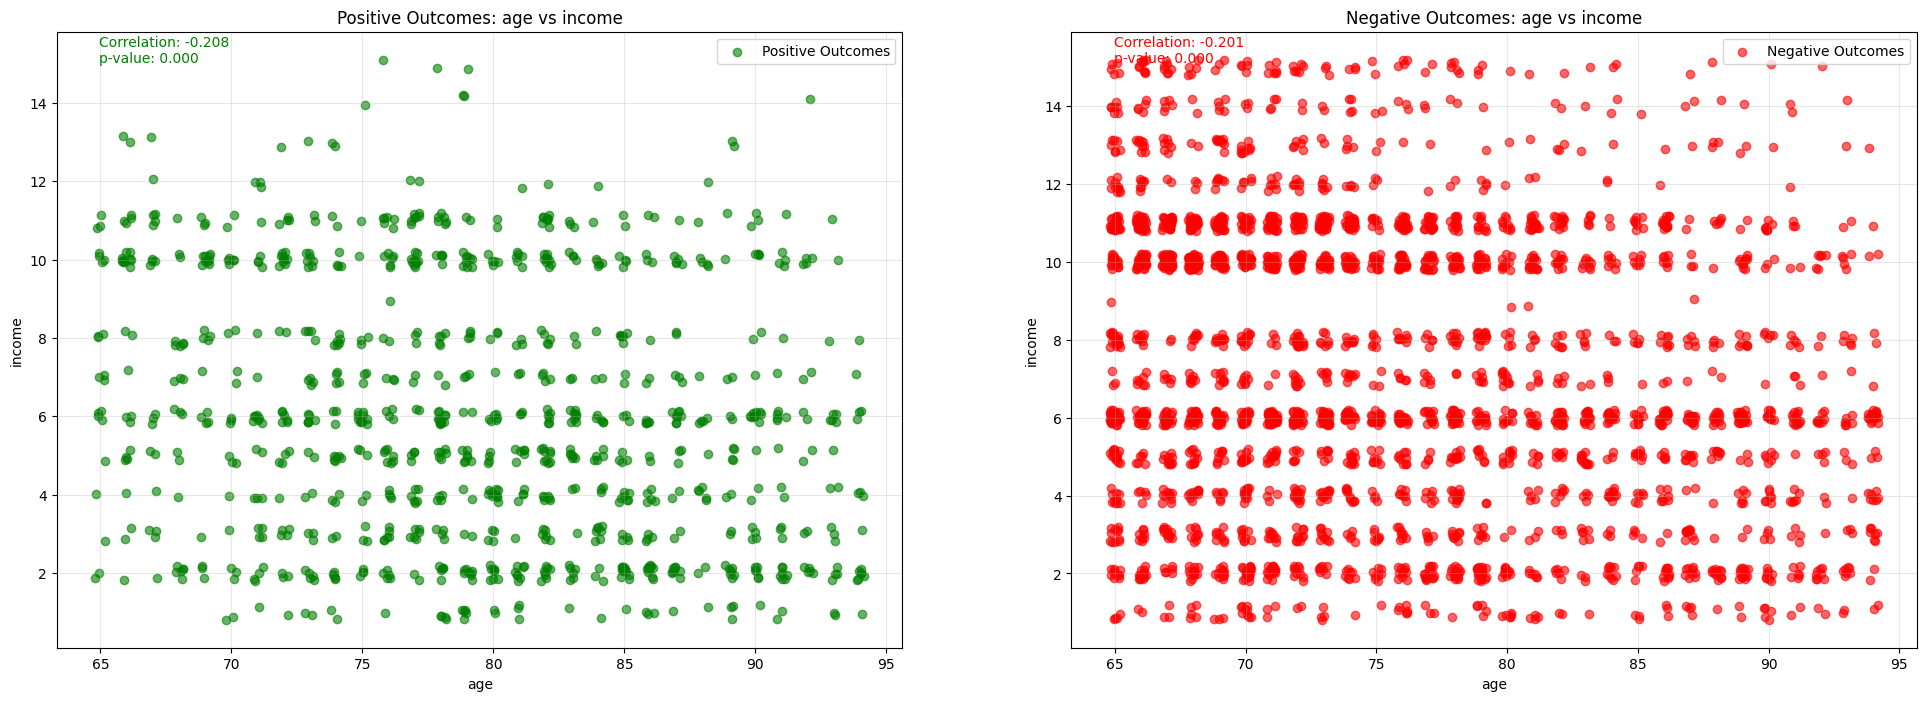

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_scatter_with_separate_correlations(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate scatter plots with separate correlation coefficients for positive and negative outcomes.
    Points are slightly offset when they overlap to show intersection.
    
    Parameters:
    - df: DataFrame containing the data
    - continuous_vars: List of continuous variable column names
    - target_var: Name of the binary target column (default='target')
    - positive_value: Value representing positive outcomes (default=1)
    - negative_value: Value representing negative outcomes (default=0)
    """
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
    
    # Split data into positive and negative outcomes
    positive_data = df[df[target_var] == positive_value]
    negative_data = df[df[target_var] == negative_value]
    
    # Calculate Pearson correlation coefficients and p-values
    pos_corr, pos_p = stats.pearsonr(positive_data[continuous_vars[0]], positive_data[continuous_vars[1]])
    neg_corr, neg_p = stats.pearsonr(negative_data[continuous_vars[0]], negative_data[continuous_vars[1]])
    
    # Add small random offset to points that overlap
    offset = 0.2
    pos_x = positive_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(positive_data))
    pos_y = positive_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(positive_data))
    neg_x = negative_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(negative_data))
    neg_y = negative_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(negative_data))
    
    # Create scatter plot with offset points
    ax1.scatter(pos_x, pos_y, color='green', label='Positive Outcomes', alpha=0.6)
    ax2.scatter(neg_x, neg_y, color='red', label='Negative Outcomes', alpha=0.6)
    
    # Add correlation annotations with p-values
    ax1.text(0.05, 0.95, f'Correlation: {pos_corr:.3f}\np-value: {pos_p:.3f}',
             transform=ax1.transAxes, color='green', fontsize=10)
    ax2.text(0.05, 0.95, f'Correlation: {neg_corr:.3f}\np-value: {neg_p:.3f}',
             transform=ax2.transAxes, color='red', fontsize=10)
    
    ax1.set_title(f'Positive Outcomes: {continuous_vars[0]} vs {continuous_vars[1]}')
    ax2.set_title(f'Negative Outcomes: {continuous_vars[0]} vs {continuous_vars[1]}')
    ax1.set_xlabel(continuous_vars[0])
    ax1.set_ylabel(continuous_vars[1])
    ax2.set_xlabel(continuous_vars[0])
    ax2.set_ylabel(continuous_vars[1])
    ax1.legend()
    ax2.legend()
    ax1.grid(True, alpha=0.3)
    ax2.grid(True, alpha=0.3)
    plt.show()

# Continuous variables and target variable
continuous_vars = ['age', 'income']
target_var = 'target'

# Call the function with the DataFrame
plot_scatter_with_separate_correlations(data, continuous_vars, target_var, positive_value=1, negative_value=0)

The corelation coeficients are both negative simply because the population is decreasing as age increases.

Again, upon seperating posative and negative outcomes into seperate plots and displaying the numeracy outcomes by offset dots, there fails to be a distiguishable pattern between out best predictor variables and outcomes. 

# conclusions from examination of the data set

1. The predictive power of the predictors are weak individually
2. A strong association between our strongest predictor variables and posative outcomes fails to be visually apparent. 
3. The strongest predictor being age does not appear to have a linear association with posative outcomes, despite the model representing the relationship log(ods) of age linearly. 

# Analysis of Model Performance

The way a Logistic Regression model works is by modeling:
log(p(outcome = 1) / (1 - p(outcome = 1))) = β₁x + β₀

Just as Linear Regression models y = β₁x + β₀, Logistic Regression models the log odds (logit) as a linear function of the predictors.

The Logistic Regression model failed to capture the subtle patterns in our data for several reasons:

1. Non-linear relationships: The relationship between age and positive outcomes is non-linear, with a peak around age 80-85. Logistic Regression assumes a linear relationship in the log odds space.

2. Feature interactions: The model missed important interactions between gender and marital status. For men, being married was highly predictive of a positive response, while marital status had little impact for women.

3. Oversimplified variable relationships: The Logistic Regression model simply predicted highest probabilities for:
   - Maximum age
   - Minimum income 
   - Minimum distance
   - Male gender (1)
   - Married status (1)

In contrast, the Random Forest model identified a more nuanced target demographic:
- Men aged 77-88 who are married
- Women in the same age range (regardless of marital status)
- Income and distance had minimal impact within this demographic

The Random Forest model's superior performance stems from its ability to:
- Handle non-linear relationships
- Capture feature interactions automatically
- Ignore irrelevant variables within specific contexts

This explains why Random Forest achieved 90% of positive responses by targeting only 30% of potential customers, while Logistic Regression required sampling 50% of customers to achieve 70% of positive responses.

# What the trend in the data that predicts response, which Logstic Regression fails to capture

In [116]:
# Get top 10 predictions from logistic regression model
data_sorted_lr = data.copy()
data_sorted_lr['predicted_probs'] = lr_model.predict_proba(X)[:, 1]
data_sorted_lr = data_sorted_lr.sort_values('predicted_probs', ascending=False).head(10)

print("Top feature combinations leading to highest confidence predictions:\n")
print("Top 10 combinations with highest predicted probability:\n")
print(data_sorted_lr[['age', 'income', 'dist', 'gender', 'marital_status', 'predicted_probs']].to_string())


Top feature combinations leading to highest confidence predictions:

Top 10 combinations with highest predicted probability:

      age  income  dist  gender  marital_status  predicted_probs
3917   94       2     1       1               1         0.648037
2393   94       2     2       1               1         0.645123
442    94       2     3       1               1         0.642198
862    90       1     2       1               1         0.627674
460    92       2     1       1               1         0.626457
2151   94       3     0       1               1         0.625239
264    90       1     5       1               1         0.618691
61     93       2     8       1               1         0.616442
1935   94       3     3       1               1         0.616234
31     92       2     7       1               1         0.608387



Analyzing patterns in strong positive predictions...

Summary statistics for cases where model is very confident of positive outcome (prob > 0.9):


,age,dist,income,gender,marital_status
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,82.565217,4.231884,5.463768,0.710145,0.811594
std,4.347001,5.401919,2.997939,0.457019,0.393901
min,74.000000,0.000000,1.000000,0.000000,0.000000
25%,79.000000,0.000000,3.000000,0.000000,1.000000
50%,82.000000,2.000000,5.000000,1.000000,1.000000
75%,86.000000,5.000000,8.000000,1.000000,1.000000
max,93.000000,18.000000,11.000000,1.000000,1.000000



Correlation of features with prediction confidence:


predicted_probs    1.000000
age                0.308585
gender             0.106436
marital_status     0.066759
dist              -0.059270
income            -0.232083
Name: predicted_probs, dtype: float64


Top feature combinations leading to highest confidence predictions:

Top 30 combinations with highest predicted probability:
 age  dist  income  gender  marital_status  predicted_probs
  80    16       4       1               1             0.99
  80    16       4       1               1             0.99
  79     0       2       0               1             0.98
  77     5      11       1               1             0.98
  85     2      10       1               1             0.98
  85     2      10       1               1             0.98
  87     0       7       1               1             0.98
  77     5      11       1               1             0.98
  79     0       2       0               1             0.98
  77     5      11       1               1             0.98


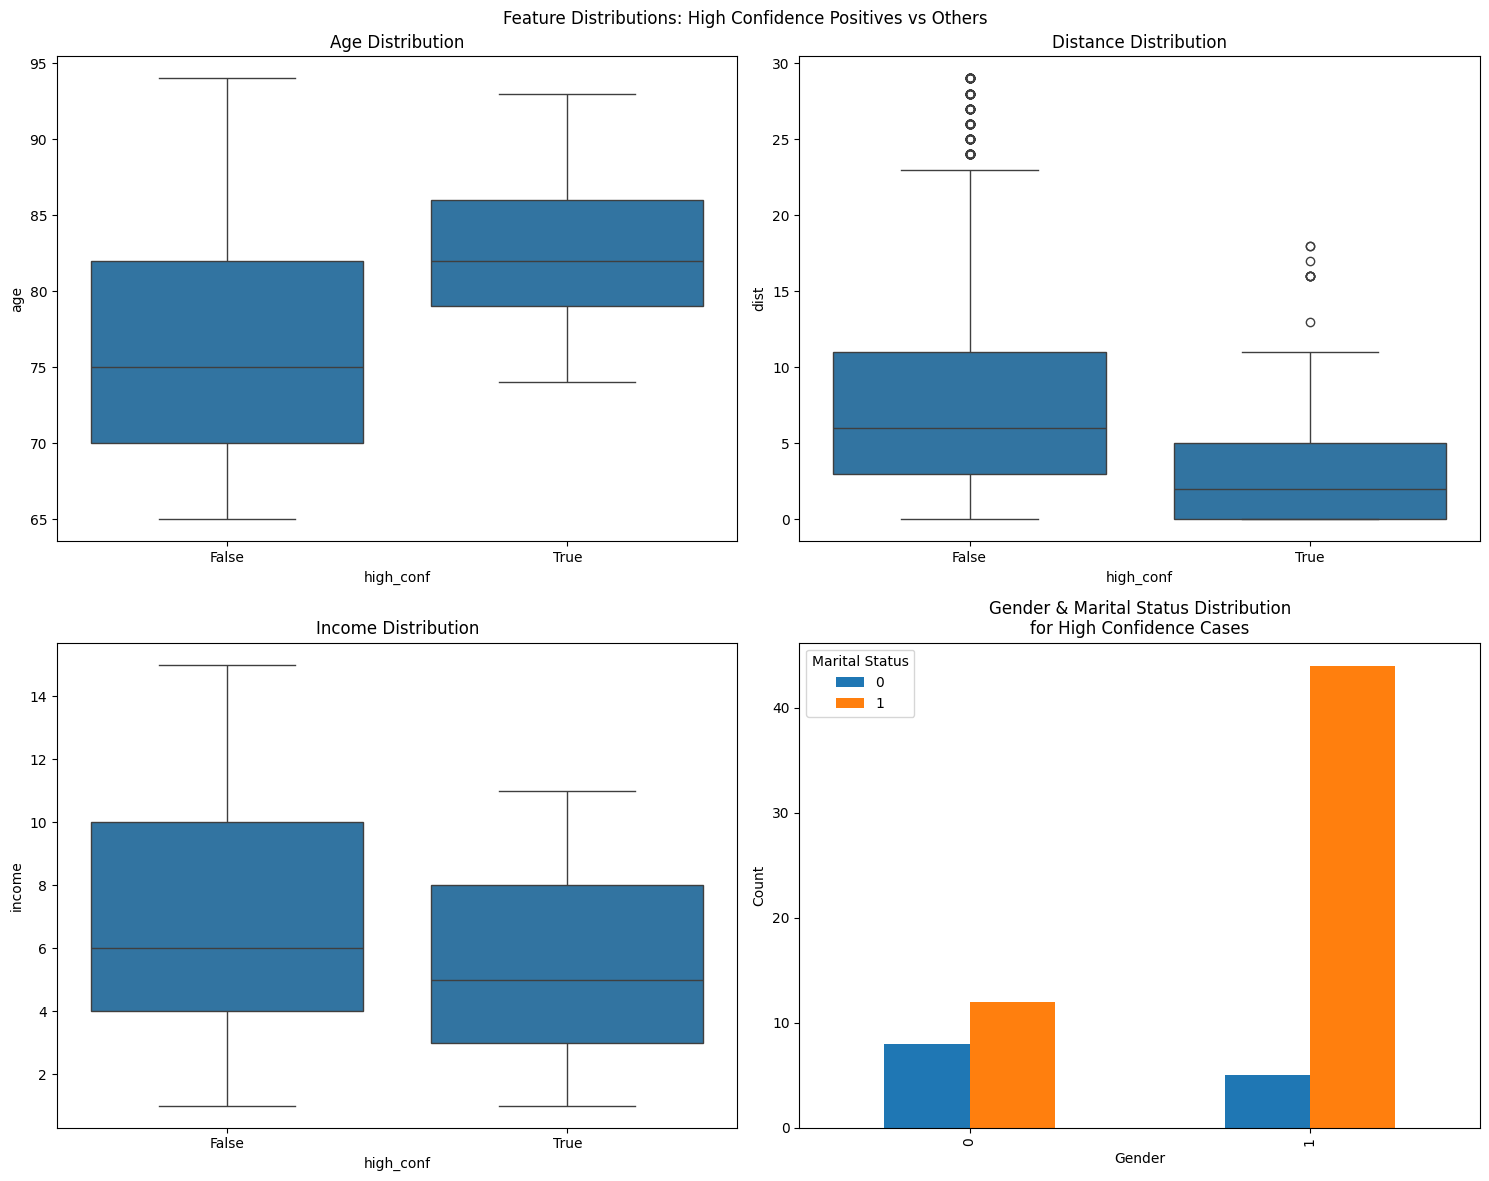

In [117]:
# Analyze patterns of high-confidence positive predictions
print("\nAnalyzing patterns in strong positive predictions...")

# Get samples where model is very confident of positive outcome (predicted_probs > 0.9)
high_confidence_positives = data_sorted[data_sorted['predicted_probs'] > 0.9].copy()

# Calculate summary statistics for these high-confidence cases
print("\nSummary statistics for cases where model is very confident of positive outcome (prob > 0.9):")
summary_stats = high_confidence_positives[['age', 'dist', 'income', 'gender', 'marital_status']].describe()
display(summary_stats)

# Calculate feature importance based on correlation with predicted probabilities
print("\nCorrelation of features with prediction confidence:")
correlations = data_sorted[['age', 'dist', 'income', 'gender', 'marital_status', 'predicted_probs']].corr()['predicted_probs'].sort_values(ascending=False)
display(correlations)

# Print combinations with highest confidence
print("\nTop feature combinations leading to highest confidence predictions:")
high_conf_combos = high_confidence_positives[['age', 'dist', 'income', 'gender', 'marital_status', 'predicted_probs']]
high_conf_combos = high_conf_combos.sort_values('predicted_probs', ascending=False).head(10)
print("\nTop 30 combinations with highest predicted probability:")
print(high_conf_combos.to_string(index=False))

# Visualize distribution of key features for high confidence predictions vs others
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Distributions: High Confidence Positives vs Others')

# Age distribution
sns.boxplot(x='high_conf', y='age', 
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

# Distance distribution
sns.boxplot(x='high_conf', y='dist',
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[0,1])
axes[0,1].set_title('Distance Distribution')

# Income distribution
sns.boxplot(x='high_conf', y='income',
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[1,0])
axes[1,0].set_title('Income Distribution')

# Categorical features - regular bar plot
cat_data = data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9)
cat_data = cat_data[cat_data['high_conf']]
gender_marital_counts = pd.crosstab(cat_data['gender'], cat_data['marital_status'])
gender_marital_counts.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Gender & Marital Status Distribution\nfor High Confidence Cases')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(title='Marital Status')

plt.tight_layout()
plt.show()

This summarizes the top combinations with a probability of positive response greater than 90%, as identified by the Random Forest model.

The pattern is clear. 

The optimal age was 82, this is evident by the plot of proportion of responses that were posative for each age, peaking a little after age 80. 

Distance didn't matter, the 3rd row was the minimum distance while the first 2 rows were at the max distance 

Income did not matter, if you remove the female observations, the min and max is from 4 to 11 which is contains 80% of the distribution of the variable over the entire data set. If you include female observations, even more. 

Gender and matrital status are connected. 

30% of the top 90% predicted prob combinations were women of which marital stats was not signifigant. 

however, 70% of the 90% predicted prob combinations were men of which an insignifigant proportion were unmarried. 

The target demo is precisely married men, aged from 77 to 88. 

## The target demo is precisely married men, aged from 77 to 88. 